[('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'F'), ('B', 'G'), ('C', 'B'), ('C', 'G'), ('D', 'B'), ('D', 'F'), ('E', 'C'), ('F', 'B'), ('G', 'B'), ('G', 'H')]
[('B', 'D'), ('C', 'E'), ('D', 'A'), ('E', 'A'), ('F', 'D'), ('G', 'C'), ('H', 'G')]


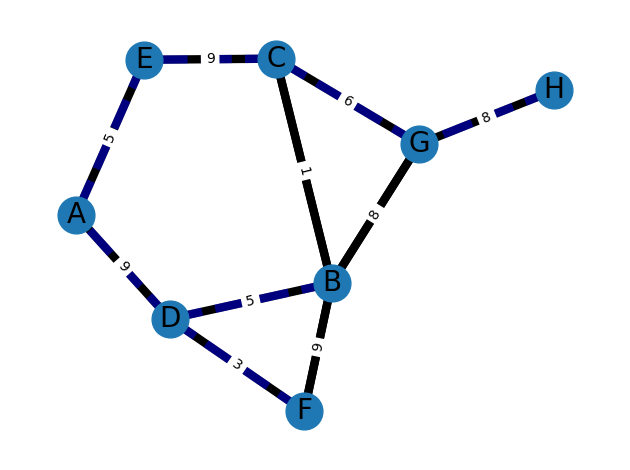

In [88]:
import matplotlib.pyplot as plt
import networkx as nx
import json
import math

G = nx.Graph()
not_colored = []
colored = []

file = open('dijkstra.json')
data = json.load(file)
for i in data['vertices']:
    vertex = i['name']
    vertex_name = i['name']
    edges = i['edges']
    for edge in edges:
        edge_name = edge['name']
        is_colored = edge['color']
        edge_weight = edge['weight']
        G.add_edge(vertex_name, edge_name, weight=edge_weight)
        vertex_char = list(vertex_name)[0]
        edge_char = list(edge_name)[0]
        if is_colored == True:
            colored.append((vertex_char, edge_char))
        if is_colored == False:
            not_colored.append((vertex_char, edge_char))


#G.add_edge("a", "b", weight=0.6)
#G.add_edge("a", "c", weight=0.2)
#G.add_edge("c", "d", weight=0.1)
#G.add_edge("c", "e", weight=0.7)
#G.add_edge("c", "f", weight=0.9)
#G.add_edge("a", "d", weight=0.3)

#elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]


#print(elarge)
#print(type(elarge))
#print(type(elarge[0]))
#print(esmall)
print(not_colored)
print(colored)

#pos = nx.spring_layout(G, seed=6)  # positions for all nodes - seed for reproducibility
#pos = nx.spring_layout(G, k=5/math.sqrt(G.order()), iterations=20)
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=not_colored, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=colored, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()